In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = r'D:\Coding\Machibe_learning\Project_01\Include\Soil-Fertilty-Prediction-Project\Data\Soil_data.csv'
data_info = pd.read_csv(file_path)
data_info

,N,P,K,ph,ec,oc,S,zn,fe,cu,Mn,B,fertility
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,0
4,220,8.6,444,7.43,0.65,0.72,11.70,0.37,0.66,0.90,2.19,1.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,326,13.4,454,7.13,0.51,0.88,5.13,0.29,4.85,0.78,9.32,0.27,2
1284,333,14.9,422,8.26,0.48,1.17,3.32,0.60,7.62,1.02,11.65,0.29,2
1285,320,13.8,391,7.38,0.65,0.68,7.54,0.38,5.41,0.89,9.05,0.63,2
1286,333,14.3,507,7.43,0.61,0.88,7.24,0.37,1.26,1.37,12.03,0.29,2


In [3]:
len(data_info)

1288

In [4]:
data_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          1288 non-null   int64  
 1   P          1288 non-null   float64
 2   K          1288 non-null   int64  
 3   ph         1288 non-null   float64
 4   ec         1288 non-null   float64
 5   oc         1288 non-null   float64
 6   S          1288 non-null   float64
 7   zn         1288 non-null   float64
 8   fe         1288 non-null   float64
 9   cu         1288 non-null   float64
 10  Mn         1288 non-null   float64
 11  B          1288 non-null   float64
 12  fertility  1288 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 130.9 KB


# STAGE 1 --- Data cleaning and preprocessing ---

In [5]:
unique_value_counts = data_info['fertility'].value_counts()
print("Unique value counts:\n", unique_value_counts)

Unique value counts:
 fertility
2    447
1    440
0    401
Name: count, dtype: int64


In [6]:
data_info.head()

,N,P,K,ph,ec,oc,S,zn,fe,cu,Mn,B,fertility
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,220,8.6,444,7.43,0.65,0.72,11.7,0.37,0.66,0.90,2.19,1.82,0


In [7]:
data_info.isnull().sum()

N            0
P            0
K            0
ph           0
ec           0
oc           0
S            0
zn           0
fe           0
cu           0
Mn           0
B            0
fertility    0
dtype: int64

In [8]:
import numpy as np

# Grab all numerical features (both float and int)
numerical_features = data_info.select_dtypes(include=[np.number]).columns.tolist()

# Remove the 'output' column if it exists in the list
if 'Output' in numerical_features:
    numerical_features.remove('fertility')

# Now 'numerical_features' doesn't include the output column.
print(numerical_features)


['N', 'P', 'K', 'ph', 'ec', 'oc', 'S', 'zn', 'fe', 'cu', 'Mn', 'B', 'fertility']


In [9]:
output_column = data_info['fertility']
print(output_column)

0       0
1       0
2       0
3       0
4       0
       ..
1283    2
1284    2
1285    2
1286    2
1287    2
Name: fertility, Length: 1288, dtype: int64


# ----Exploratory Data Analysis and Visualization---

# Things to Analyze:
# 1.Balance of Target Variable → Distribution of soil fertility classifications (e.g., fertile vs. infertile soil or varying fertility levels).
# 2.Distributions of Features → Examine attributes like soil pH, moisture content, nitrogen-phosphorus-potassium (NPK) levels, organic matter, and temperature to identify potential skews in the data.
# 3.Feature Relationships → Analyze correlations between key soil properties (e.g., pH vs. nutrient levels) and visualize patterns using scatterplots or pairplots.
# 3.Time Series Analysis → Investigate seasonal variations in soil fertility by tracking changes in moisture, nutrient levels, and crop yield across different time periods.

In [10]:
data_info[numerical_features].corr()

,N,P,K,ph,ec,oc,S,zn,fe,cu,Mn,B,fertility
N,1.000000,0.093832,0.038923,0.121486,-0.070546,0.008829,-0.235340,0.023866,0.099257,-0.256674,0.130461,-0.240333,0.659255
P,0.093832,1.000000,0.100911,0.016134,0.088453,-0.002942,-0.113835,-0.018667,0.100791,-0.069810,-0.059330,-0.101292,0.234447
K,0.038923,0.100911,1.000000,0.027218,-0.090475,-0.022500,0.058651,0.000427,-0.152482,-0.075039,0.030665,0.125149,0.001726
ph,0.121486,0.016134,0.027218,1.000000,0.018229,-0.029233,0.027662,-0.008797,-0.046303,0.015778,-0.020260,0.014457,0.127335
ec,-0.070546,0.088453,-0.090475,0.018229,1.000000,0.003355,0.099952,-0.024310,-0.086731,0.023008,0.005247,0.007272,-0.081856
oc,0.008829,-0.002942,-0.022500,-0.029233,0.003355,1.000000,0.043683,0.605668,0.210331,0.015133,-0.064141,0.090147,0.043513
S,-0.235340,-0.113835,0.058651,0.027662,0.099952,0.043683,1.000000,-0.006780,-0.216963,0.177997,-0.132230,0.429421,-0.157644
zn,0.023866,-0.018667,0.000427,-0.008797,-0.024310,0.605668,-0.006780,1.000000,0.467914,-0.030785,-0.054453,0.057715,-0.001295
fe,0.099257,0.100791,-0.152482,-0.046303,-0.086731,0.210331,-0.216963,0.467914,1.000000,0.186790,0.225458,-0.379040,0.010342
cu,-0.256674,-0.069810,-0.075039,0.015778,0.023008,0.015133,0.177997,-0.030785,0.186790,1.000000,0.068562,0.062537,-0.178057


In [11]:
corr_matrix = data_info[numerical_features].corr()

In [12]:
corr_pairs = corr_matrix.unstack()
# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs < 1]
# Optionally, to drop duplicate pairs (like (A, B) and (B, A)):
corr_pairs = corr_pairs.drop_duplicates()


In [13]:
strongest_pair = corr_pairs.abs().sort_values(ascending=False).head(1)
print("Strongest correlation pair:", strongest_pair.index[0])
print("Correlation value:", corr_pairs.loc[strongest_pair.index[0]])


Strongest correlation pair: ('N', 'fertility')
Correlation value: 0.6592546557402685


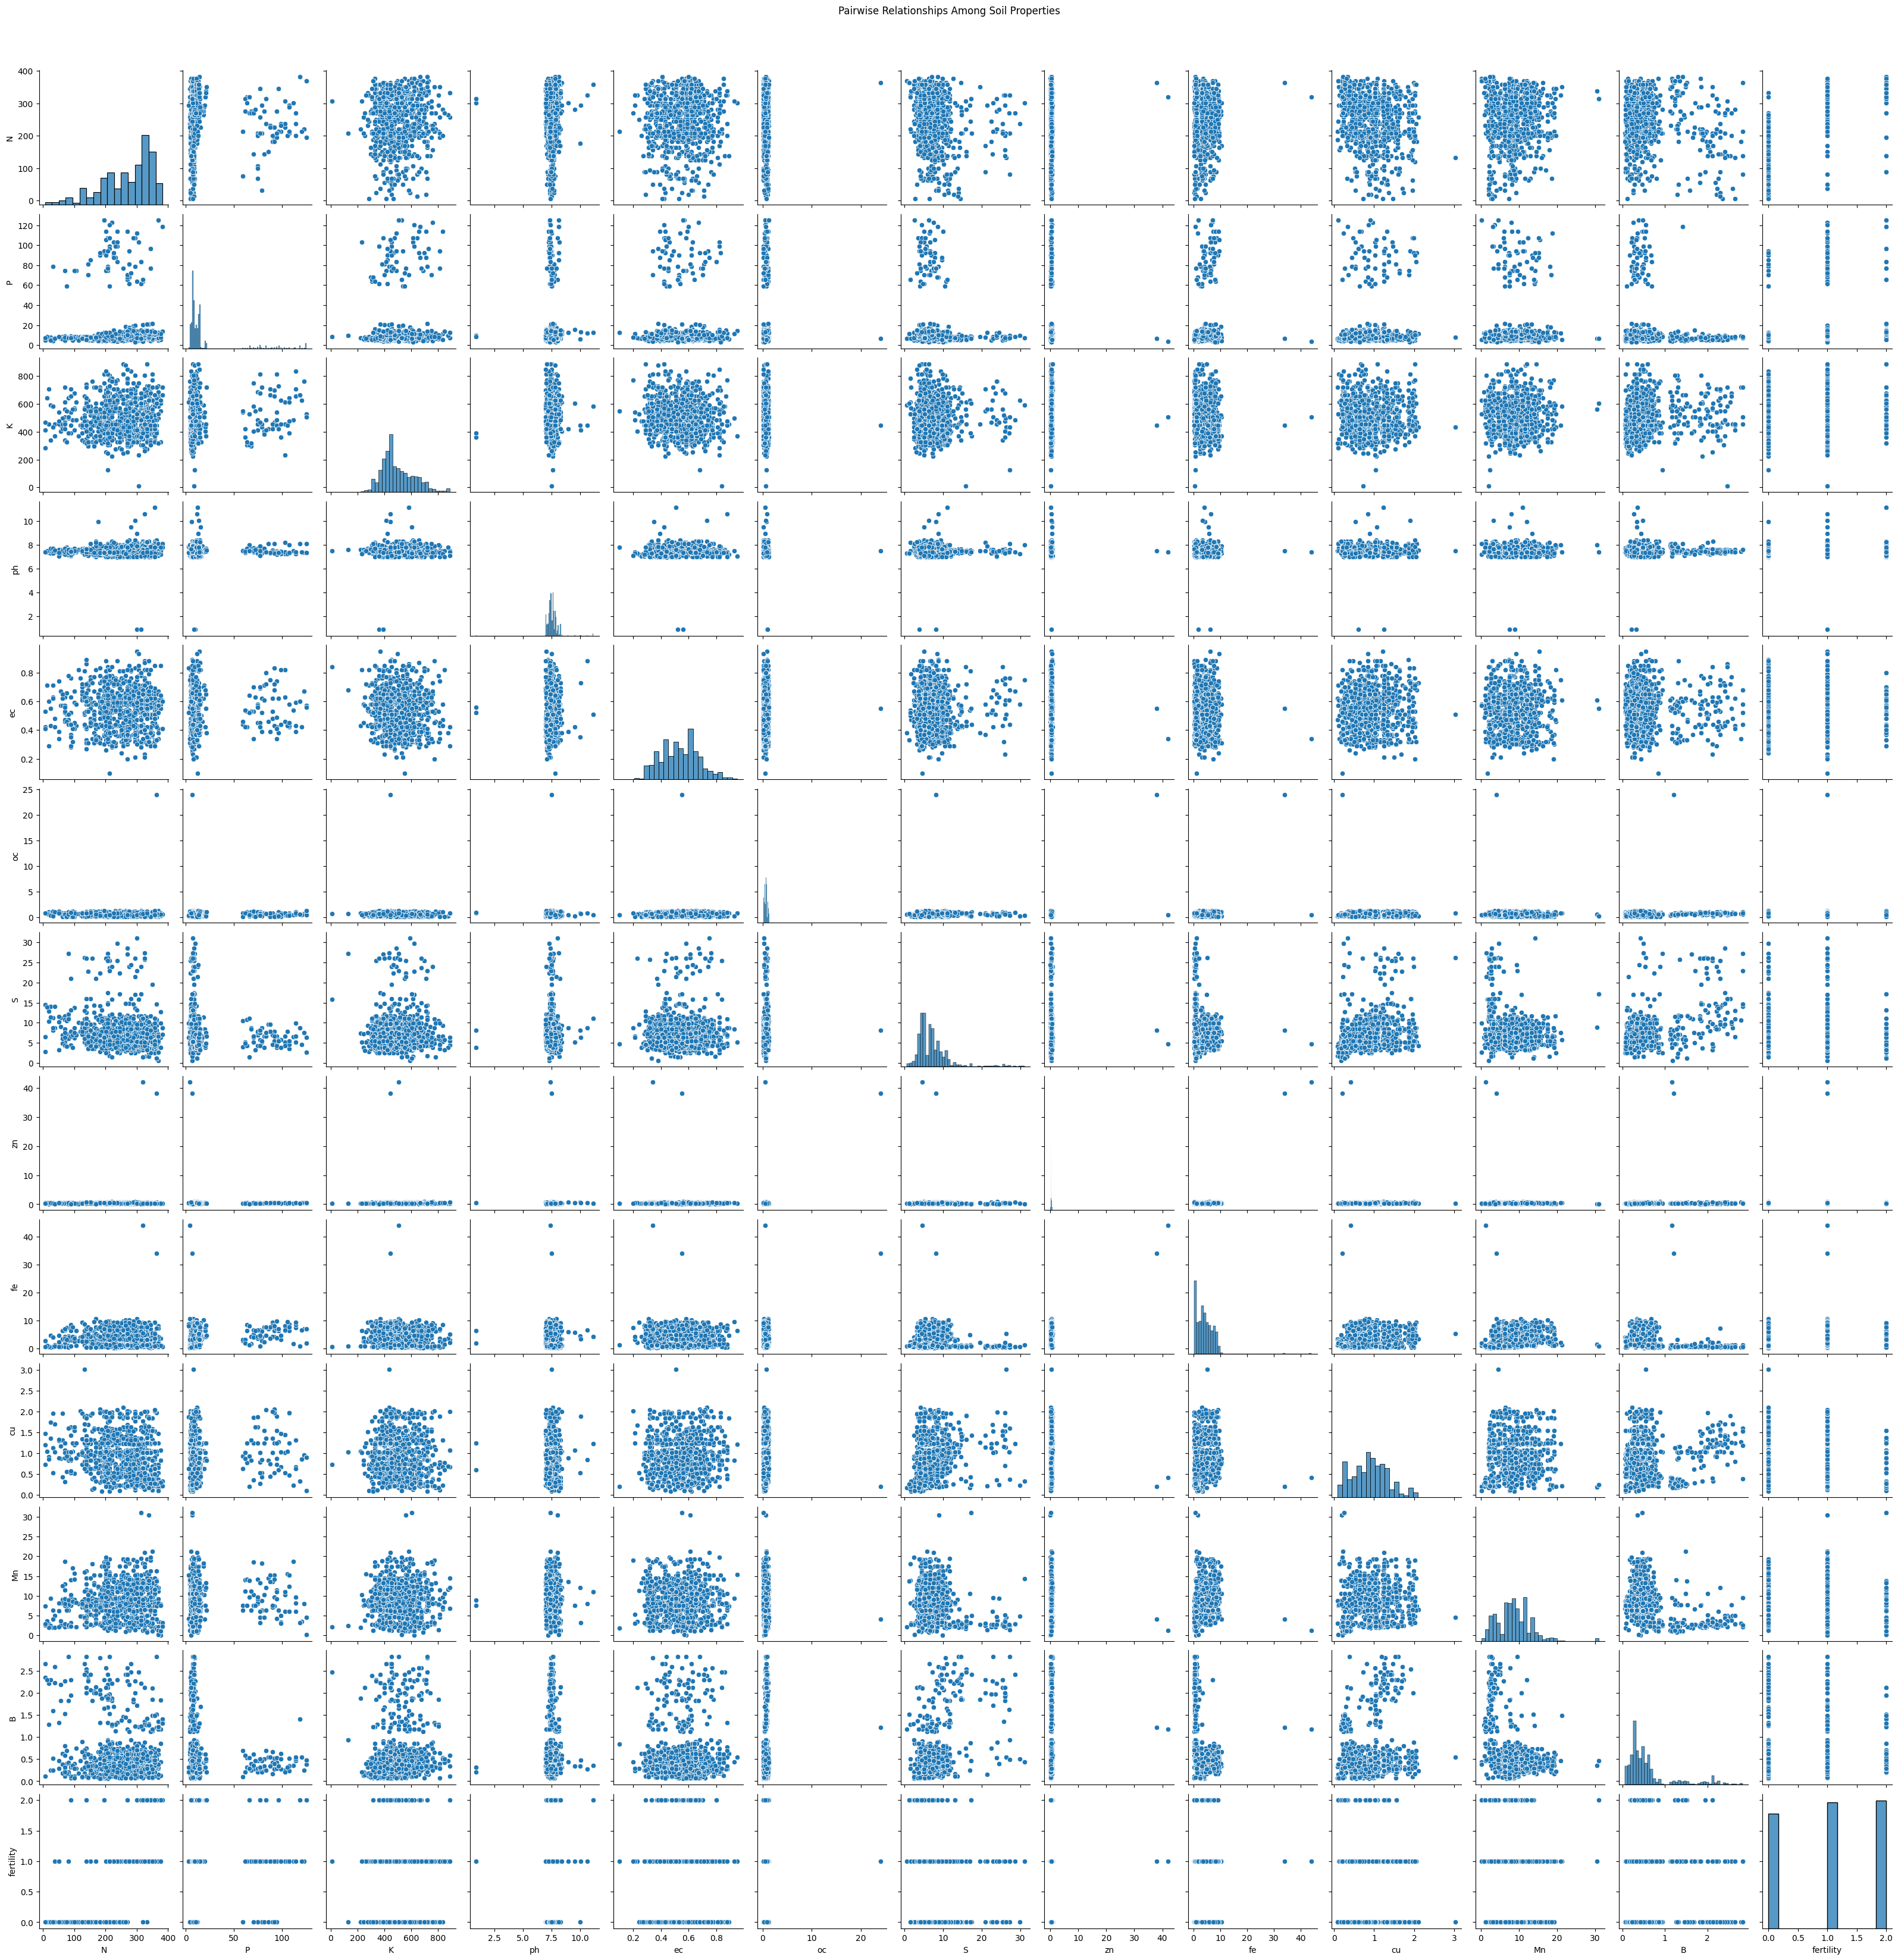

In [14]:
# Create a pairplot for the numerical features
sns.pairplot(data_info[numerical_features])
plt.suptitle("Pairwise Relationships Among Soil Properties", y=1.02)
plt.show()


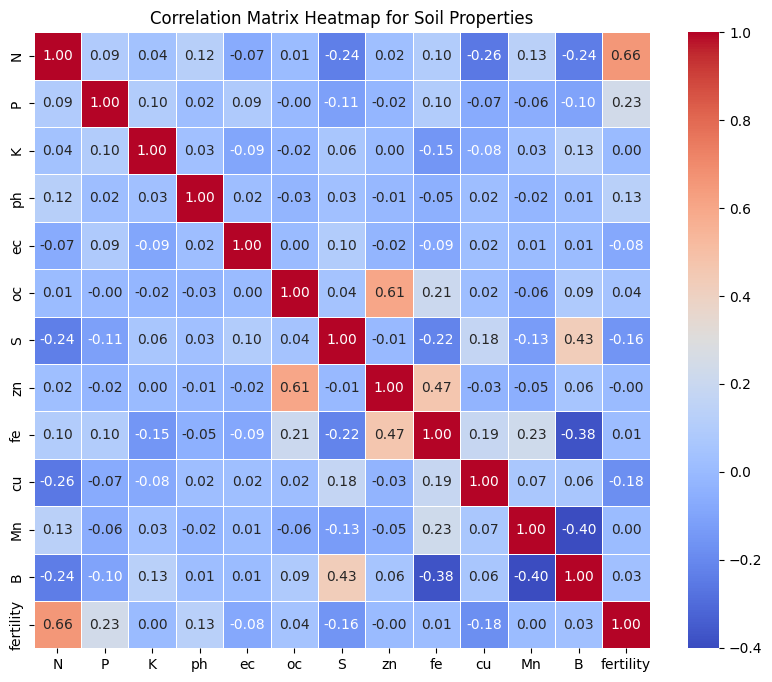

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for these features
corr_matrix = data_info[numerical_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap with annotations of the correlation coefficients
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)

plt.title("Correlation Matrix Heatmap for Soil Properties")
plt.show()


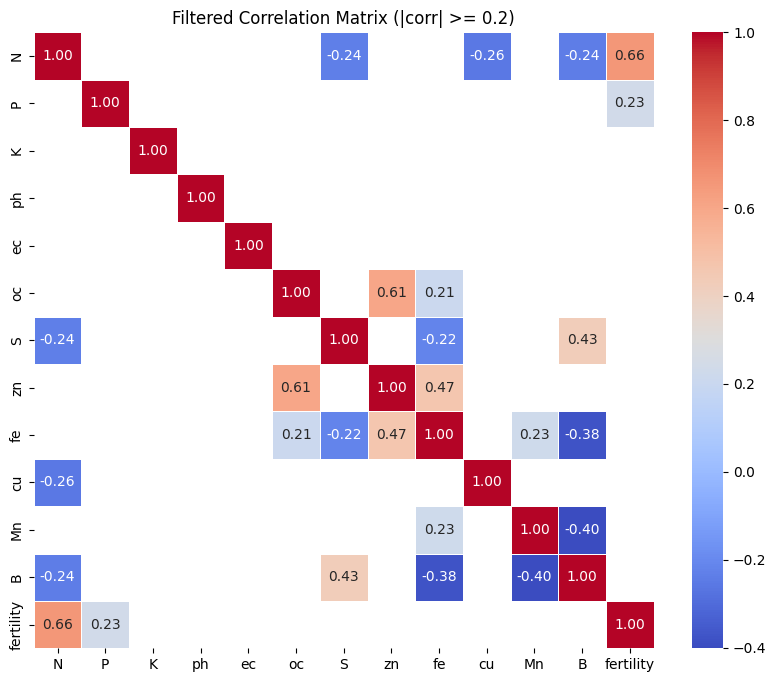

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix as before
corr_matrix = data_info[numerical_features].corr()

# Define a threshold (for example, |correlation| >= 0.7)
threshold = 0.2
filtered_corr = corr_matrix.copy()
filtered_corr[np.abs(filtered_corr) < threshold] = np.nan

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Filtered Correlation Matrix (|corr| >= 0.2)")
plt.show()


N   fertility    0.659255
oc  zn           0.605668
zn  fe           0.467914
S   B            0.429421
Mn  B            0.401705
dtype: float64


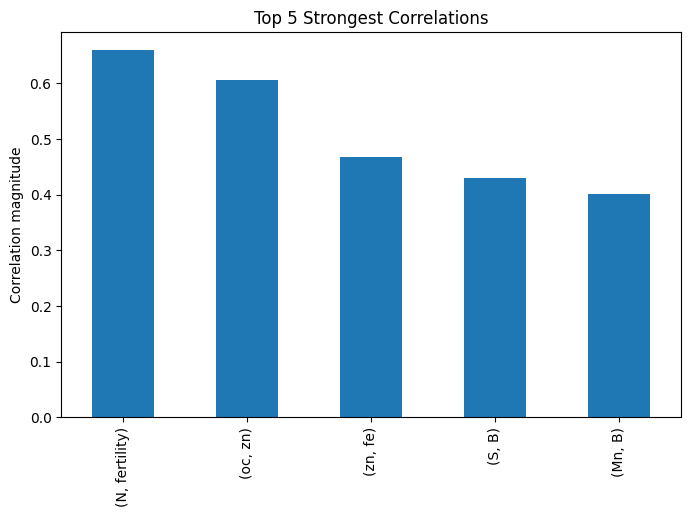

In [17]:
# Unstack the matrix to get pairs, filter out self-correlations, and drop duplicates
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1].drop_duplicates()

# Get the top 5 pairs by absolute correlation value
top_pairs = corr_pairs.abs().sort_values(ascending=False).head(5)
print(top_pairs)

# Optional: Plot these pairs as a bar chart
top_pairs.plot(kind='bar', figsize=(8,5))
plt.ylabel("Correlation magnitude")
plt.title("Top 5 Strongest Correlations")
plt.show()


# --- Cleaning and EDA Stage complete ---